# Introduction

In this project I'll be working with a dataset containing image data for some handwritten digits. I'll be initially using the K-Nearest Neighbors algorithm to classify the digits and compute the accuracy scores for a number of k values, before moving on to training a Neural network with 1, 2 and 3 hidden layers to see if we can have any improvement on the accuracy.

# Reading and Exploring the Data

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [21]:
digits = load_digits()

In [22]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [23]:
labels = digits['target']
labels = pd.Series(labels)

In [24]:
digits_data = digits['data']
digits_data = pd.DataFrame(digits_data)
digits_data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [25]:
first_image = digits_data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

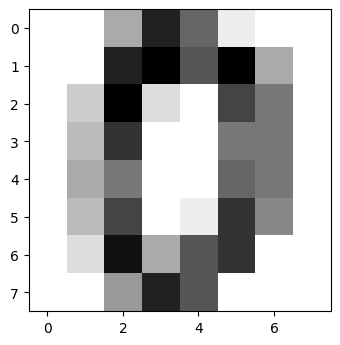

In [26]:
%matplotlib inline
plt.imshow(np_image, cmap='gray_r')

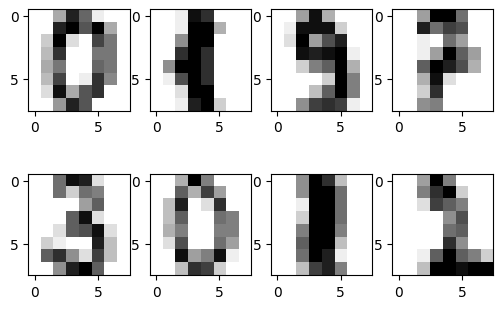

In [27]:
fig, ax = plt.subplots(2, 4)

ax[0,0].imshow(digits_data.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0,1].imshow(digits_data.iloc[99].values.reshape(8,8), cmap='gray_r')
ax[0,2].imshow(digits_data.iloc[199].values.reshape(8,8), cmap='gray_r')
ax[0,3].imshow(digits_data.iloc[299].values.reshape(8,8), cmap='gray_r')

ax[1,0].imshow(digits_data.iloc[999].values.reshape(8,8), cmap='gray_r')
ax[1,1].imshow(digits_data.iloc[1099].values.reshape(8,8), cmap='gray_r')
ax[1,2].imshow(digits_data.iloc[1199].values.reshape(8,8), cmap='gray_r')
ax[1,3].imshow(digits_data.iloc[1299].values.reshape(8,8), cmap='gray_r')

# Training and testing the K Nearest Neighbors Model

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

#Creating the training and testing pipeline
def train_knn(n_neighbors, train_features, train_labels):
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(train_features, train_labels)
    return model

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    return accuracy

#Performing 4 fold cross validation on the model
def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=1, shuffle=True)
    for train_index, test_index in kf.split(digits_data):
        train_features, test_features = digits_data.loc[train_index], digits_data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]

        model = train_knn(k, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
        
    return fold_accuracies

knn_one_accuracy = cross_validate(1)
print(np.mean(knn_one_accuracy))
    


0.9827456075228903


Text(0.5, 1.0, 'Mean Accuracy vs k')

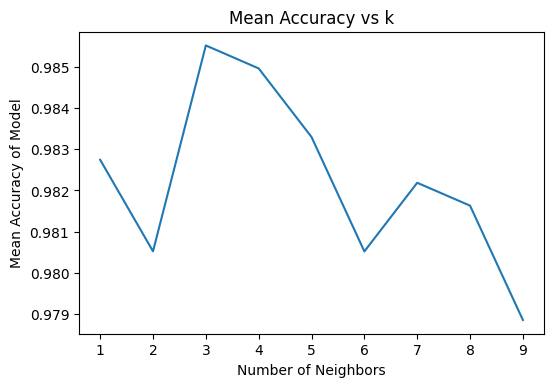

In [29]:
k_values = list(range(1,10))
k_accuracies = []

#Varying the value of k and testing 9 different models
for k in k_values:
    knn_accuracies = cross_validate(k)
    mean_knn_accuracies = np.mean(knn_accuracies)
    k_accuracies.append(mean_knn_accuracies)
    
plt.plot(k_values, k_accuracies)
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Accuracy of Model')
plt.title('Mean Accuracy vs k')
    

**Summary**
We can see that the highest accuracy was reached with a k value of 3 at around 98.5-98.6%, before any further increase in k drops the accuracy

In [30]:
from sklearn.neural_network import MLPClassifier
hidden_layer_neurons = [(8,),
                        (16,),
                        (32,),
                        (64,),
                        (128,),
                        (256,)  ]

def train_mlp(neurons, train_features, train_labels):
    model = MLPClassifier(hidden_layer_sizes = neurons)
    model.fit(train_features, train_labels)
    return model

def test_mlp(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    return accuracy

def cross_validate(neurons):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=1, shuffle=True)
    for train_index, test_index in kf.split(digits_data):
        train_features, test_features = digits_data.loc[train_index], digits_data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]

        model = train_mlp(neurons, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
        
    return fold_accuracies


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

Text(0.5, 1.0, 'Mean Accuracy vs Number of Neurons')

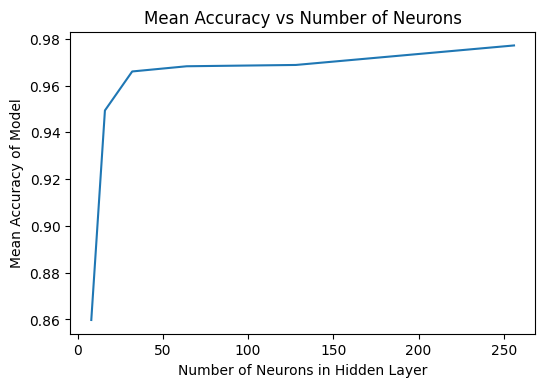

In [31]:
mlp_accuracies = []
n_neurons = [8, 16, 32, 64, 128, 256]
for neuron in hidden_layer_neurons:
    nn_accuracies = cross_validate(neuron)
    mean_nn_accuracies = np.mean(nn_accuracies)
    mlp_accuracies.append(mean_nn_accuracies)
    
plt.plot(n_neurons, mlp_accuracies)
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Mean Accuracy of Model')
plt.title('Mean Accuracy vs Number of Neurons')

**Summary:**  It seems as if a single layer neural network does not confer any advantages over KNN for this classification problem - adding more neurons to the single hidden layer improved accuracy to somewhere between 97 and 98%.

Text(0.5, 1.0, 'Mean Accuracy vs Number of Neurons - Two Hidden Layers')

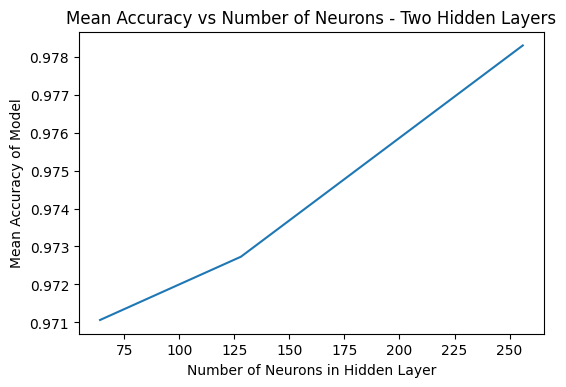

In [32]:
hidden_layer_neurons = [(64, 64), (128, 128), (256, 256)]
nn_two_layer_accuracies = []

for neurons in hidden_layer_neurons:
    nn_accuracies = cross_validate(neurons)
    mean_nn_accuracies = np.mean(nn_accuracies)
    nn_two_layer_accuracies.append(mean_nn_accuracies)

n_neurons_2 = [64, 128, 256]
plt.plot(n_neurons_2, nn_two_layer_accuracies)
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Mean Accuracy of Model')
plt.title('Mean Accuracy vs Number of Neurons - Two Hidden Layers')   

**Summary:** We can see that using two hidden layers has improved the accuracy somewhat, closer to 98%.  Since we performed 4-fold cross validation we can be relatively confident that overfitting has not occurred.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

Text(0.5, 1.0, 'Mean Accuracy vs Number of Neurons - Three Hidden Layers')

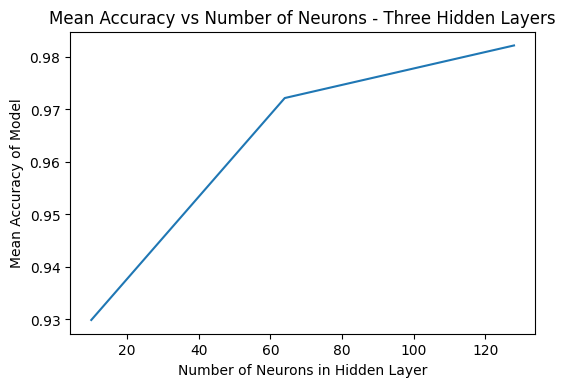

In [33]:
hidden_layer_neurons = [(10,10,10),
                       (64, 64, 64),
                       (128, 128, 128)]
nn_three_layer_accuracies = []

#Modifying the function to use 6 fold CV
def cross_validate(neurons):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=1, shuffle=True)
    for train_index, test_index in kf.split(digits_data):
        train_features, test_features = digits_data.loc[train_index], digits_data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]

        model = train_mlp(neurons, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
        
    return fold_accuracies

for neurons in hidden_layer_neurons:
    nn_accuracies = cross_validate(neurons)
    mean_nn_accuracies = np.mean(nn_accuracies)
    nn_three_layer_accuracies.append(mean_nn_accuracies)

n_neurons_3 = [10, 64, 128]
plt.plot(n_neurons_3, nn_three_layer_accuracies)
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Mean Accuracy of Model')
plt.title('Mean Accuracy vs Number of Neurons - Three Hidden Layers')   

**Summary:** We can see that using three hidden layers improved accuracy further over two hidden layers.  It has to be stated however, that the accuracy is similar, or less than the KNN model with k=3. This implies that using the MLP Classifier was not the optimal model for this problem, given the long computation time relative to KNN and no significant accuracy improvements.